<div class="alert alert-info">
Ссылка для просмотра ноутбука в интерактивном режиме для использования гиперссылок и корректного отображения разметки:<br>
<a href='https://nbviewer.org/github/yulianikola/portfolio/blob/master/data_analysis_python/2_hypothesis/hypothesis_games.ipynb'>hypothesis_games</a></div>

### Тестирование гипотез
#### Данные о продажах и оценках видео-игр

https://www.kaggle.com/ashaheedq/video-games-sales-2019?select=vgsales-12-4-2019.csv. 
<h4>Задание</h4>
Сформулируйте нулевую и альтернативную гипотезы; выберите пороговый уровень статистической значимости; опишите полученные результаты статистического теста.
<p id="0">
<h4>Содержание</h4>
<ul type="square"><a href="#1"><li>Знакомство с данными</li></a>
<a href="#2"><li>Как критики относятся к спортивным играм?</li></a>
<a href="#3"><li>Критикам нравятся больше игры на PC или на PS4?</li></a>
<a href="#4"><li>Критикам больше нравятся стрелялки или стратегии?</li></a>

Данные о продажах и рейтингах спарсены на момент 12 апреля 2019. Столбец Year - это год релиза игры.

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

<p id="1">
<h4>Знакомство с данными</h4>

In [2]:
games = pd.read_csv('c:\\python\\portfolio\\data_analysis_python\\2_hypothesis\\data\\video_games_sales.csv')
pd.set_option('display.max_columns', 120) # чтобы увидеть все столбцы, так как их больше 20
games.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


Перечень столбцов датафрейма:

In [3]:
games.columns

Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object')

Для тестирования гипотез нам понадобятся следующие данные датафрейма:
* 'Critic_Score' оценка критика
* 'Genre' жанр игры
* 'Platform' платформа игры

Соответственно смыслу столбцов Critic_Score имеет числовый тип данных, а Genre и Platform - object. Также раз по столбцу Critic_Score в .info() определился числовой тип данных, то среди его значений нет нечисловых символов, которыми могут обозначать пропущенные значения:

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

Посчитаем непустые значения для столбцов:

In [5]:
value_count = games.groupby(games.index).count().sum()

По оценкам критиков всего 6536 записей из 55792, а информация о жанре и платформе есть для каждой записи:

In [6]:
value_count[value_count.index.isin(['Critic_Score','Genre','Platform'])]

Genre           55792
Platform        55792
Critic_Score     6536
dtype: int64

Запишем в отдельный датафрейм записи, для которых есть оценка критиков, и далее будем работать с ним:

In [7]:
games_crit = games[~games.Critic_Score.isna()]
games_crit.shape

(6536, 23)

Судя по значениям столбцов категориальных признаков, "нестандартных" пустот вроде "?" нет:

In [8]:
print(games_crit.Genre.unique())
print('')
print(games_crit.Platform.unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Misc' 'Party' 'Simulation'
 'Action' 'Shooter' 'Action-Adventure' 'Fighting' 'Strategy' 'Adventure'
 'MMO' 'Music' 'Puzzle' 'Sandbox' 'Board Game' 'Education' 'Visual Novel']

['Wii' 'NES' 'GB' 'DS' 'PC' 'X360' 'SNES' 'PS3' 'PS4' '3DS' 'PS2' 'GBA'
 'NS' 'N64' 'PS' 'XOne' 'WiiU' 'XB' 'PSP' 'GC' 'GBC' 'PSN' 'DC' 'PSV'
 'SAT' 'GEN' 'XBL' 'VC' 'DSiW' 'WW' 'AJ' 'NGage' 'Linux' 'OSX' 'iOS' 'SCD']


Список столбцов без пропусков:

In [9]:
n_rows = games.shape[0]
n_rows

55792

In [10]:
full_columns = list(value_count[value_count.values==n_rows].index)
full_columns

['Rank',
 'Name',
 'basename',
 'Genre',
 'Platform',
 'Publisher',
 'url',
 'status',
 'img_url']

Проверим наличие дубликатов среди записей, для которых есть оценка критика, для столбцов без пустот:

In [11]:
games_crit.duplicated(full_columns, keep=False).sort_values()

0        False
15630    False
15625    False
15624    False
15616    False
         ...  
4753     False
4743     False
4740     False
4775     False
55653    False
Length: 6536, dtype: bool

Проверим дубликаты среди записей, для которых есть оценка критика, для столбцов без пустот кроме Rank:

In [12]:
games_crit.duplicated(full_columns.remove('Rank'), keep = False).sort_values()

0        False
15630    False
15625    False
15624    False
15616    False
         ...  
4753     False
4743     False
4740     False
4775     False
55653    False
Length: 6536, dtype: bool

Дубликатов нет.

Посчитаем статистики для единственного из интересующих нас столбцов с числовыми значениями. Судя по результатам выбросов или неадекватных значений нет:

In [13]:
games_crit['Critic_Score'].describe()

count    6536.000000
mean        7.213709
std         1.454079
min         1.000000
25%         6.400000
50%         7.500000
75%         8.300000
max        10.000000
Name: Critic_Score, dtype: float64

<a href="#0"><h4>Наверх</h4></a>

<p id="2">
<h4>Как критики относятся к спортивным играм?</h4>

Посмотрим, какие значения принимает столбец с жанрами и их частоты. В данном вопросе нас интересуют спортивные игры, которые в данных обозначены как "Sports". В наших данных критики оценили 688 спортивных игр:

In [14]:
games_crit.Genre.value_counts()

Action              1024
Role-Playing         857
Shooter              843
Sports               688
Platform             564
Racing               463
Adventure            394
Strategy             369
Misc                 338
Fighting             328
Puzzle               285
Simulation           229
Action-Adventure      99
Music                 25
Party                 15
MMO                   10
Visual Novel           2
Sandbox                1
Board Game             1
Education              1
Name: Genre, dtype: int64

Предположу, что критикам не очень нравятся спортивные игры, что выражается в средней оценке менее 8 баллов. Сформулируем гипотезы:<br>
* Нулевая гипотеза: средняя оценка критиков по спортивным играм  8 баллов и выше.
* Альтернативная: средняя оценка критиков по спортивным играм меньше 8 баллов.

Выделим оценки критиков по спортивным играм:

In [15]:
crit_sport = games_crit.loc[games_crit.Genre == 'Sports']['Critic_Score']
crit_sport.shape

(688,)

Средняя оценка критиков по спортивным играм в наших данных составляет 7.3:

In [16]:
crit_sport.mean()

7.291424418604655

Посмотрим распределение этих оценок.
* Распределение скошено влево, значит высокие оценки ставят чаще чем низкие. По форме распределение выглядит не совсем нормально, но так как выборка немаленького размера - 688 наблюдений, то положимся на ЦПТ и будем считать распределение средних оценок спортивных игр нормальным.
* Боксплот также отражает скошенность влево и близость среднего к верхнему краю значений.

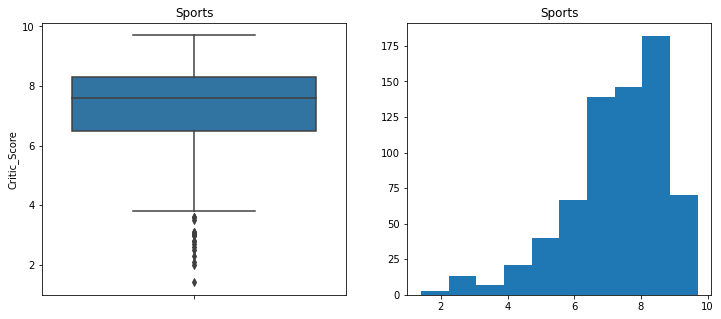

In [17]:
plt.figure(figsize = (12, 5)) 
plt.subplot(1,2,1)
sns.boxplot(y = crit_sport);
plt.title('Sports');
plt.subplot(1,2,2)
plt.hist(crit_sport);
plt.title('Sports');

Признак количественный. Распределение средних оценок спортивных игр считаем нормальным. Выборка одна, сравнение с константой. Используем Т-тест односторонний, так как нам важно направление.
Уровень значимости здесь и далее возьмем общепринятый 5%.

In [18]:
stats.ttest_1samp(a = crit_sport, popmean = 8, alternative = 'less')

Ttest_1sampResult(statistic=-12.636478781984286, pvalue=2.3162780528973857e-33)

* При условии, что Н0 верна (т.е. критики в среднем оценивают спортивные игры на 8 баллов и выше), данные показывают очень маловероятные результаты. 
* При условии, что Н0 верна, вероятность полученного (или более экстремального) значения тестовой статистики по сути равна 0.
* По нашим данным аргументов в пользу H0 практически нет.
* Отвергаем Н0 в пользу Н1.
* Выборочное среднее 7.3. По тесту это статистически значимое отклонение от 8 в меньшую сторону. Пожалуй, с практической точки зрения эту разницу тоже можно считать значимой.
* Критики в среднем не высоко оценивают спортивные игры, средняя оценка критиков меньше 8.

<a href="#0"><h4>Наверх</h4></a>

<p id="3">
<h4>Критикам нравятся больше игры на PC или на PS4?</h4>

Посмотрим, какие значения принимает столбец с платформами и их частоты. В данном вопросе нас интересуют PC и PS4, которые в данных так и обозначены. В наших данных критики оценили 865 игр на PC и 109 игр на PS4:

In [19]:
games_crit.Platform.value_counts()

PC       865
X360     626
PS3      498
PSP      415
PS2      381
GBA      380
PSN      359
Wii      347
GC       330
XBL      328
DS       319
PS       267
DC       246
3DS      222
XB       132
NS       130
PS4      109
N64      102
WW        84
WiiU      78
VC        70
XOne      57
NGage     45
DSiW      41
SNES      27
GB        25
SAT       21
PSV        7
GBC        6
SCD        5
NES        4
GEN        3
iOS        3
OSX        2
AJ         1
Linux      1
Name: Platform, dtype: int64

Предположу, что критикам больше нравятся игры на РС чем на PS4, что выражается в более высокой средней оценке игр на РС по сравнению с играми на PS4. Сформулируем гипотезы:<br>
* Нулевая гипотеза: средняя оценка критиков по играм на РС равна или ниже, чем средняя оценка критиков по играм на PS4.
* Альтернативная: средняя оценка критиков по играм на РС выше, чем средняя оценка критиков по играм на PS4.

Разделим оценки критиков по играм на разных платформах:

In [20]:
crit_pc = games_crit.loc[games_crit.Platform == 'PC']['Critic_Score']
crit_ps4 = games_crit.loc[games_crit.Platform == 'PS4']['Critic_Score']
print(crit_pc.shape)
print(crit_ps4.shape)

(865,)
(109,)


Средняя оценка критиков по PC в наших данных чуть ниже чем по PS4: 7.5 vs. 7.9:

In [21]:
print('средняя оценка для pc', crit_pc.mean())
print('средняя оценка для ps4', crit_ps4.mean())

средняя оценка для pc 7.541849710982658
средняя оценка для ps4 7.904587155963299


Посмотрим распределение этих оценок.
* Распределения скошены влево, выглядят не совсем нормально, но так как выборки немаленького размера - 865 и 109 наблюдений, то положимся на ЦПТ и будем считать распределения средних оценок игр на РС и игр на PS4 нормальными.
* Боксплоты также отражает скошенность влево и близость средних к верхнему краю значений.

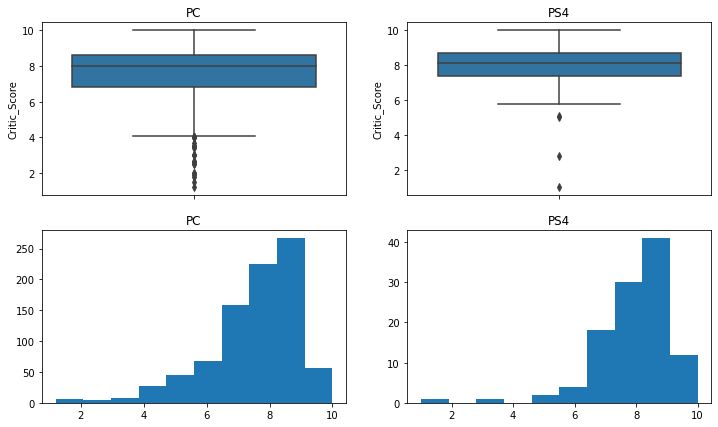

In [22]:
plt.figure(figsize = (12, 7)) 
plt.subplot(2,2,1)
sns.boxplot(y = crit_pc);
plt.title('PC');
plt.subplot(2,2,2)
sns.boxplot(y = crit_ps4);
plt.title('PS4');
plt.subplot(2,2,3)
plt.hist(crit_pc);
plt.title('PC');
plt.subplot(2,2,4)
plt.hist(crit_ps4);
plt.title('PS4');

Признак количественный. Распределения средних оценок игр на РС и PS4 считаем нормальными. Две независимых выборки, сравниваем два средних. Используем Т-тест для независимых выборок, односторонний, так как нам важно направление.

Равны ли дисперсии оценок игр на PC и PS4? Разница между выборочными стандартными отклонениями 12%. Есть мнение, что при разнице больше 5 % считать дисперсии неравными. Есть отдельная группа тестов для проверки равенства дисперсий. Есть мнение, что поправка Уэлча для профилактики не должна навредить. Есть мнение, что использование поправки в случае, когда дисперсии равны, увеличивает вероятность ошибки 2го рода (не отвергнуть некорректную нулевую). В документации теста ttest_ind сказано, что в случае неравных дисперсий, отсутствие поправки занижает р значение. Опираясь на разницу между ср.кв.откл в 12 %, сделаем поправку Уэлча и попробуем учесть все остальные "но" при интерпретации.

In [23]:
print('ско оценок для pc ', crit_pc.std())
print('ско оценок для ps4 ', crit_ps4.std())
print('относительная разница ско ', (crit_pc.std() - crit_ps4.std()) / crit_ps4.std())

ско оценок для pc  1.435191399217218
ско оценок для ps4  1.2851275567977332
относительная разница ско  0.11676960907554759


In [24]:
t,p = stats.ttest_ind(crit_pc, crit_ps4, alternative = 'greater', equal_var = False)
print(t,p)

-2.7394476056351627 0.996534095874873


* При условии, что Н0 верна (т.е. критики в среднем оценивают игры РС также как PS4 или хуже), данные не противоречат Н0. 
* При условии, что Н0 верна, вероятность полученного (или более экстремального) значения тестовой статистики равна почти 100%.
* По нашим данным более чем достаточно аргументов в пользу H0.
* Не отвергаем Н0 в пользу Н1.
* Выборочные средние 7.5 (PC) и 7.9 (PS4). По тесту средняя оценка PC не отличается статистически значимо в большую сторону от средней оценки PS4. Пожалуй, с практической точки зрения эту разницу тоже можно считать незначимой.
* Критики в среднем оценивают игры РС также как PS4 или хуже.

По итогам теста мы не отвергаем нулевую, поэтому риск повышенной ошибки 2 рода для нас тут актуален. Но р-значение настолько большое, что в данном случае его завышенность значения не имеет. Можем для проверки провести тест без поправки, хотя в статистике так не принято и это считается р-хаккингом. Отсутствие поправки на тест практически не повлияло:

In [25]:
t,p = stats.ttest_ind(crit_pc, crit_ps4, alternative = 'greater')
print(t,p)

-2.5145460239776942 0.9939604628953504


<a href="#0"><h4>Наверх</h4></a>

<p id="4">
<h4>Критикам больше нравятся стрелялки или стратегии?</h4>

Вернемся к столбцу с жанрами. В данном вопросе нас интересуют стрелялки и стратегии, которые в данных обозначены как "Shooter" и "Strategy". В наших данных критики оценили 843 стрелялки и 369 стратегий:

In [26]:
games_crit.Genre.value_counts()

Action              1024
Role-Playing         857
Shooter              843
Sports               688
Platform             564
Racing               463
Adventure            394
Strategy             369
Misc                 338
Fighting             328
Puzzle               285
Simulation           229
Action-Adventure      99
Music                 25
Party                 15
MMO                   10
Visual Novel           2
Sandbox                1
Board Game             1
Education              1
Name: Genre, dtype: int64

Предположу, что критикам больше нравятся стрелялки, чем стратегии, что выражается в более высокой средней оценке стрелялок по сравнению со стратегиями. Сформулируем гипотезы:<br><br>
* Нулевая гипотеза: средняя оценка критиков по стрелялкам равна или ниже, чем средняя оценка критиков по стратегиям.
* Альтернативная: средняя оценка критиков по стрелялкам выше, чем средняя оценка критиков по стратегиям.

Разделим оценки критиков по играм разных жанров:

In [27]:
crit_shoot = games_crit.loc[games_crit.Genre == 'Shooter']['Critic_Score']
crit_strat = games_crit.loc[games_crit.Genre == 'Strategy']['Critic_Score']
print(crit_shoot.shape)
print(crit_strat.shape)

(843,)
(369,)


Средняя оценка критиков по стрелялкам в наших данных ниже чем по стратегиям: 7.28 vs. 7.42:

In [28]:
print('средняя оценка стрелялок ', crit_shoot.mean())
print('средняя оценка стратегий ', crit_strat.mean())

средняя оценка стрелялок  7.2868327402135264
средняя оценка стратегий  7.429268292682925


Посмотрим распределение этих оценок.
* Распределения скошены влево, выглядят не совсем нормально, но так как выборки немаленького размера - 843 и 369 наблюдений, то положимся на ЦПТ и будем считать распределения средних оценок стрелялок и стратегий нормальными.
* Боксплоты также отражает скошенность влево и близость средних к верхнему краю значений.

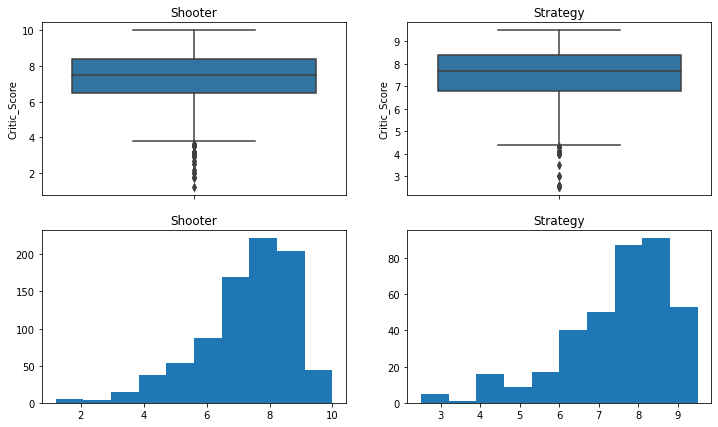

In [29]:
plt.figure(figsize = (12, 7)) 
plt.subplot(2,2,1)
sns.boxplot(y = crit_shoot);
plt.title('Shooter');
plt.subplot(2,2,2)
sns.boxplot(y = crit_strat);
plt.title('Strategy');
plt.subplot(2,2,3)
plt.hist(crit_shoot);
plt.title('Shooter');
plt.subplot(2,2,4)
plt.hist(crit_strat);
plt.title('Strategy');

Признак количественный. Распределения средних оценок стрелялок и стратегий считаем нормальными. Две независимых выборки, сравниваем два средних. Используем Т-тест для независимых выборок, односторонний, так как нам важно направление.

Равны ли дисперсии оценок стрелялок и стратегий? Разница между выборочными стандартными отклонениями 7 %. Опираясь на разницу между ср.кв.откл в 7 %, не будем делать поправку Уэлча и попробуем учесть все остальные "но" при интерпретации:

In [30]:
print('ско оценок стрелялок ',crit_shoot.std())
print('ско оценок стратегий ',crit_strat.std())
print('относительная разница ско ',(crit_shoot.std() - crit_strat.std()) / crit_strat.std())

ско оценок стрелялок  1.4923414319201953
ско оценок стратегий  1.3865854824373596
относительная разница ско  0.07627077509634417


In [31]:
t,p = stats.ttest_ind(crit_shoot, crit_strat, alternative = 'greater')
print(t,p)

-1.5618791808752566 0.9407110290333128


* При условии, что Н0 верна (т.е. критики в среднем оценивают стрелялки также как стратегии или хуже), данные не противоречат Н0. 
* При условии, что Н0 верна, вероятность полученного значения (или более экстремального) тестовой статистики равна почти 95%.
* По нашим данным более чем достаточно аргументов в пользу H0.
* Не отвергаем Н0 в пользу Н1.
* Выборочные средние 7.28 (стрелялки) и 7.42 (стратегии). По тесту средняя оценка стрелялок не отличается статистически значимо в большую сторону от средней оценки стратегий. Пожалуй, с практической точки зрения эту разницу тоже можно считать незначимой.
* Критики в среднем оценивают стрелялки также как стратегии или хуже.

Так как поправку не сделали, то есть риск, что р-значение занижено, если дисперсии на самом деле не равны. Но р-значение настолько большое, что в данном случае его заниженность значения не имеет. Можем для проверки провести тест с поправкой, хотя в статистике так не принято и это считается р-хаккингом. Наличие поправки на тест практически не повлияло:

In [32]:
t,p = stats.ttest_ind(crit_shoot, crit_strat, alternative = 'greater', equal_var = False)
print(t,p)

-1.6073949711166526 0.9458060679288847


<a href="#0"><h4>Наверх</h4></a>